In [29]:

import matplotlib.pyplot as plt
import pandas as pd
import scienceplots

from modelforge.datasets.datasets import heating_dataset
from modelforge.model_clustering.transformer.sampler.set.criterion_selector.target_selector import TargetSelector
from modelforge.model_clustering.transformer.sampler.set.measure.entropy import Entropy
from modelforge.model_clustering.transformer.sampler.set.uniform_set_sampler import UniformSetSampler
from modelforge.visualization.helper import dataset_sizes, datasets, read_experiment_results


In [30]:
experiment_date = "2025-04-29-15:18"
experiment = "embedding_dimensionality"

In [31]:
df, pipeline_groups, pipeline_groups_clean = read_experiment_results(experiment, experiment_date)

In [32]:
df['pipeline_group'].unique()

array(['prediction_loss', 'prediction'], dtype=object)

In [33]:
df

,dataset,loss,pipeline,pipeline_group,cluster_loss,model_loss,cluster_var,model_var,num_clusters
0,anomaly,roc_auc,pairwise_loss_uniform_target_entropy_7,prediction_loss,0.560002,0.605849,0.005747,0.029264,71
1,anomaly,NaN,pairwise_loss_uniform_target_entropy_7,prediction_loss,0.560002,0.605849,0.005747,0.029264,71
2,anomaly,roc_auc,pairwise_loss_uniform_target_entropy_9,prediction_loss,0.569981,0.605849,0.007753,0.029264,71
3,anomaly,NaN,pairwise_loss_uniform_target_entropy_9,prediction_loss,0.569981,0.605849,0.007753,0.029264,71
4,anomaly,roc_auc,pairwise_loss_uniform_target_entropy_8,prediction_loss,0.568056,0.605849,0.006655,0.029264,71
...,...,...,...,...,...,...,...,...,...
475,weather_probabilistic,NaN,prediction_set_uniform_target_median_15,prediction,0.827475,0.854452,0.001878,0.014164,24
476,weather_probabilistic,crps,prediction_set_uniform_target_median_14,prediction,0.827028,0.854452,0.001605,0.014164,24
477,weather_probabilistic,NaN,prediction_set_uniform_target_median_14,prediction,0.827028,0.854452,0.001605,0.014164,24
478,weather_probabilistic,crps,prediction_set_uniform_target_median_13,prediction,0.828576,0.854452,0.002308,0.014164,24


In [34]:
def embedding_size(x):
    if "prediction_loss" in x:
        x = x.split("_")[-1]
        return int(x)
    x = x.split("_")[-1]
    return int(x)


df["embedding_size"] = df["pipeline"].apply(lambda x: embedding_size(x))
df

,dataset,loss,pipeline,pipeline_group,cluster_loss,model_loss,cluster_var,model_var,num_clusters,embedding_size
0,anomaly,roc_auc,pairwise_loss_uniform_target_entropy_7,prediction_loss,0.560002,0.605849,0.005747,0.029264,71,7
1,anomaly,NaN,pairwise_loss_uniform_target_entropy_7,prediction_loss,0.560002,0.605849,0.005747,0.029264,71,7
2,anomaly,roc_auc,pairwise_loss_uniform_target_entropy_9,prediction_loss,0.569981,0.605849,0.007753,0.029264,71,9
3,anomaly,NaN,pairwise_loss_uniform_target_entropy_9,prediction_loss,0.569981,0.605849,0.007753,0.029264,71,9
4,anomaly,roc_auc,pairwise_loss_uniform_target_entropy_8,prediction_loss,0.568056,0.605849,0.006655,0.029264,71,8
...,...,...,...,...,...,...,...,...,...,...
475,weather_probabilistic,NaN,prediction_set_uniform_target_median_15,prediction,0.827475,0.854452,0.001878,0.014164,24,15
476,weather_probabilistic,crps,prediction_set_uniform_target_median_14,prediction,0.827028,0.854452,0.001605,0.014164,24,14
477,weather_probabilistic,NaN,prediction_set_uniform_target_median_14,prediction,0.827028,0.854452,0.001605,0.014164,24,14
478,weather_probabilistic,crps,prediction_set_uniform_target_median_13,prediction,0.828576,0.854452,0.002308,0.014164,24,13


In [35]:
df = df[~pd.isna(df['loss'])]
df

,dataset,loss,pipeline,pipeline_group,cluster_loss,model_loss,cluster_var,model_var,num_clusters,embedding_size
0,anomaly,roc_auc,pairwise_loss_uniform_target_entropy_7,prediction_loss,0.560002,0.605849,0.005747,0.029264,71,7
2,anomaly,roc_auc,pairwise_loss_uniform_target_entropy_9,prediction_loss,0.569981,0.605849,0.007753,0.029264,71,9
4,anomaly,roc_auc,pairwise_loss_uniform_target_entropy_8,prediction_loss,0.568056,0.605849,0.006655,0.029264,71,8
6,anomaly,roc_auc,pairwise_loss_uniform_target_entropy_1,prediction_loss,0.527476,0.605849,0.006205,0.029264,71,1
8,anomaly,roc_auc,pairwise_loss_uniform_target_entropy_6,prediction_loss,0.570867,0.605849,0.006321,0.029264,71,6
...,...,...,...,...,...,...,...,...,...,...
470,weather_probabilistic,crps,prediction_set_max_target_var_13,prediction,0.827965,0.854452,0.001835,0.014164,24,13
472,weather_probabilistic,crps,prediction_set_uniform_target_median_12,prediction,0.828596,0.854452,0.001968,0.014164,24,12
474,weather_probabilistic,crps,prediction_set_uniform_target_median_15,prediction,0.827475,0.854452,0.001878,0.014164,24,15
476,weather_probabilistic,crps,prediction_set_uniform_target_median_14,prediction,0.827028,0.854452,0.001605,0.014164,24,14


In [36]:
def pipeline_name(x):
    x = x.split("_")[:-1]
    return "_".join(x)


df['pipeline_name'] = df["pipeline"].apply(pipeline_name)
df

/var/folders/r2/hcn2fz917sgbfxx4jfzr324w0000gn/T/ipykernel_69751/4033694849.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pipeline_name'] = df["pipeline"].apply(pipeline_name)


,dataset,loss,pipeline,pipeline_group,cluster_loss,model_loss,cluster_var,model_var,num_clusters,embedding_size,pipeline_name
0,anomaly,roc_auc,pairwise_loss_uniform_target_entropy_7,prediction_loss,0.560002,0.605849,0.005747,0.029264,71,7,pairwise_loss_uniform_target_entropy
2,anomaly,roc_auc,pairwise_loss_uniform_target_entropy_9,prediction_loss,0.569981,0.605849,0.007753,0.029264,71,9,pairwise_loss_uniform_target_entropy
4,anomaly,roc_auc,pairwise_loss_uniform_target_entropy_8,prediction_loss,0.568056,0.605849,0.006655,0.029264,71,8,pairwise_loss_uniform_target_entropy
6,anomaly,roc_auc,pairwise_loss_uniform_target_entropy_1,prediction_loss,0.527476,0.605849,0.006205,0.029264,71,1,pairwise_loss_uniform_target_entropy
8,anomaly,roc_auc,pairwise_loss_uniform_target_entropy_6,prediction_loss,0.570867,0.605849,0.006321,0.029264,71,6,pairwise_loss_uniform_target_entropy
...,...,...,...,...,...,...,...,...,...,...,...
470,weather_probabilistic,crps,prediction_set_max_target_var_13,prediction,0.827965,0.854452,0.001835,0.014164,24,13,prediction_set_max_target_var
472,weather_probabilistic,crps,prediction_set_uniform_target_median_12,prediction,0.828596,0.854452,0.001968,0.014164,24,12,prediction_set_uniform_target_median
474,weather_probabilistic,crps,prediction_set_uniform_target_median_15,prediction,0.827475,0.854452,0.001878,0.014164,24,15,prediction_set_uniform_target_median
476,weather_probabilistic,crps,prediction_set_uniform_target_median_14,prediction,0.827028,0.854452,0.001605,0.014164,24,14,prediction_set_uniform_target_median


In [37]:
df['pipeline_group'].unique()

array(['prediction_loss', 'prediction'], dtype=object)

In [38]:
df['pipeline_name'].unique()

array(['pairwise_loss_uniform_target_entropy',
       'prediction_set_uniform_target_median',
       'prediction_set_max_target_var'], dtype=object)

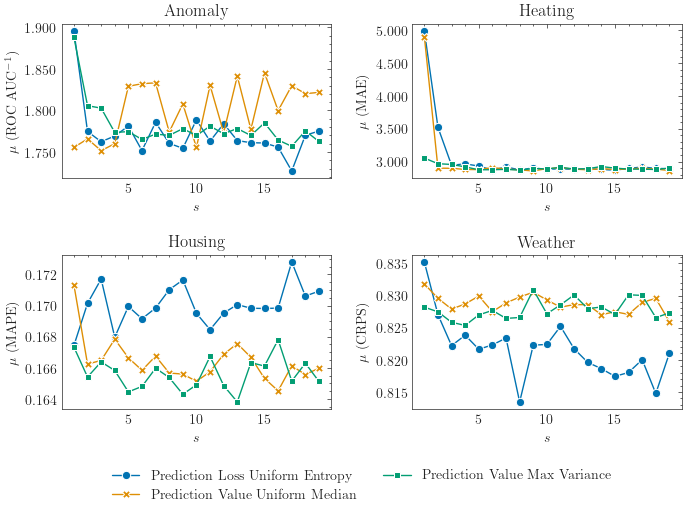

In [39]:
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter
sns.set_style("white")

def sanitize_pipeline_name(pipeline_name):
    split = pipeline_name.split("_")
    split = [c.capitalize() for c in split]
    return ' '.join(split).replace("Target ", "").replace("Var", "Variance").replace("Prediction", "Prediction Value").replace("Pairwise Loss", "Prediction Loss").replace("Set ", "")

ratio = 3.5 / 2.625
with plt.style.context('science'):
    fig, axes = plt.subplots(2, 2, figsize=(8, 5))
    fig.subplots_adjust(wspace=0.2, hspace=0.3)  # Adjust padding

    axes = axes.flatten()
    pipeline_names_plot = ['prediction_set_uniform_target_median', 'pairwise_loss_uniform_target_entropy', 'prediction_set_max_target_var']

    labels = ["Anomaly", "Heating", "Housing", "Weather"]
    scores = ["ROC AUC$^{-1}$", "MAE", "MAPE", "CRPS"]
    for i, (dataset, dataset_size) in enumerate(zip(datasets, dataset_sizes)):
        df_dataset = df[(df["dataset"] == dataset) &
                        (df["pipeline_name"].isin(pipeline_names_plot)) &
                        (df['embedding_size'] < 20)].copy()

        if dataset == "anomaly":
            df_dataset['cluster_loss'] = 1 / df_dataset['cluster_loss']

        sns.lineplot(
            data=df_dataset,
            x="embedding_size",
            y="cluster_loss",
            hue="pipeline_name",
            style="pipeline_name",  # Assign different markers based on hue
            markers=True,           # Enables markers
            dashes=False,           # Ensures solid lines instead of dashed ones
            ax=axes[i],
            palette="colorblind",
            markersize=6
        )
        axes[i].set_ylabel(r"$\mu$ (" + scores[i] + ")")
        axes[i].set_xlabel(r"$s$")
        axes[i].set_title(f"{labels[i]}")
        axes[i].yaxis.set_major_formatter(StrMethodFormatter('{x:,.3f}'))  # Format to 2 decimal places
        axes[i].legend().remove()

    # Create shared legend at the bottom
    handles, labels = axes[0].get_legend_handles_labels()
    labels = [sanitize_pipeline_name(label) for label in labels]
    #labels = ["Prediction Uniform Target Median", "Prediction Max Target Variance", "Prediction Loss Uniform Target Entropy"]
    fig.legend(handles, labels, loc="lower center", bbox_to_anchor=(0.5, -0.1), ncol=2, frameon=False)
    plt.subplots_adjust(wspace=0.3, hspace=0.5)
    fig.savefig("../../reports/figures/embedding_size/embedding_size_top_3.png")
    plt.show()


## Analyse embedding space

### Explained variance using PCA

In [40]:
embedding_df_heating = pd.read_csv("../../data/results/embedding_dimensionality/heating/pairwise_loss_2025-02-14-12:49/pairwise_loss_uniform_target_entropy_1010/137/embedding.csv")
embedding_df_anomaly = pd.read_csv("../../data/results/embedding_dimensionality/anomaly/pairwise_loss_2025-02-14-12:49/pairwise_loss_uniform_target_entropy_1010/107/embedding.csv")
embedding_df_housing = pd.read_csv("../../data/results/embedding_dimensionality/house_price/pairwise_loss_2025-02-14-12:49/pairwise_loss_uniform_target_entropy_1010/116/embedding.csv")
embedding_df_weather = pd.read_csv("../../data/results/embedding_dimensionality/weather_probabilistic/pairwise_loss_2025-02-14-12:49/pairwise_loss_uniform_target_entropy_1010/24/embedding.csv")

In [41]:
from sklearn.decomposition import PCA


def explained_variance_plot(embedding_df: pd.DataFrame, max_num_components=None):
    if max_num_components is None:
        max_num_components = len(embedding_df.columns)
    explained_variance = []
    for i in range(max_num_components):
        pca = PCA(n_components=i)
        pca.fit(embedding_df)
        explained_variance.append({
            "num_components": i,
            "explained_variance": np.sum(pca.explained_variance_),
            "explained_variance_ratio": np.sum(pca.explained_variance_ratio_),
            "noise_variance": pca.noise_variance_
        })
    explained_variance_df = pd.DataFrame(explained_variance)
    sns.lineplot(explained_variance_df, x='num_components', y='explained_variance_ratio')


#explained_variance_plot(embedding_df_heating, max_num_components=25)

In [42]:
def get_top_variance_columns(df, n=2):
    """
    Returns the names of the n columns with the highest variance in a pandas DataFrame.

    Args:
      df: The pandas DataFrame.
      n: The number of columns to return (default: 2).

    Returns:
      A list of column names with the highest variance.
    """
    if df.empty:
        return []

    variances = df.var()
    top_n_columns = variances.nlargest(n).index.tolist()
    return df[top_n_columns]

#sns.scatterplot(get_top_variance_columns(embedding_df_heating, 2), x='embedding_32', y='embedding_103')

In [43]:



def embedding_2d(embedding_df: pd.DataFrame, reduction):
    embedding_df_2 = pd.DataFrame(reduction(n_components=2, transform_seed=42).fit_transform(embedding_df))
    plt.figure(figsize=(4,4))
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.gca().set_aspect('equal', adjustable='box')
    min_dim = min(embedding_df_2[0].min(), embedding_df_2[1].min())
    max_dim = max(embedding_df_2[0].max(), embedding_df_2[1].max())
    plt.xlim(min_dim - 0.05, max_dim + 0.05)
    plt.ylim(min_dim - 0.05, max_dim + 0.05)
    sns.scatterplot(
        x=embedding_df_2[0],
        y=embedding_df_2[1],
        s=1
    )




embedding_df_heating



,Unnamed: 0,cluster,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,embedding_8,embedding_9
0,00EF3CA5-0081-4021-98B7-0E2D48E3C845,16,27.059654,39.128635,26.974976,29.968099,0.768477,30.155721,23.669247,34.029502,1.413143,4.910739
1,0166210D-B550-4A97-B18C-F74E4698882C,100,6.076772,19.213891,7.138252,9.968866,6.817800,13.425415,10.136183,17.014961,28.689929,11.056473
2,016F91E6-8CB0-429E-B416-D0F409F08EF2,103,6.253226,9.748863,7.135019,6.181436,2.724934,12.215447,9.780376,4.725145,39.018593,22.628156
3,01741B79-67C4-4889-96F8-0CA59B6D64D6,9,8.199995,27.575423,9.901807,10.146216,1.079905,16.289789,8.267801,21.969814,25.233464,4.782580
4,01D4A958-49BC-4EA1-A2C9-D4ECC81463DC,119,11.709498,11.625157,18.357001,10.279748,14.354112,10.783535,20.039111,10.009973,43.068735,24.948604
...,...,...,...,...,...,...,...,...,...,...,...,...
912,FEF30916-256B-4238-A88D-D6FFB1241B19,136,26.947142,37.991588,26.732968,30.638169,1.125405,30.381032,24.423841,32.355778,1.511472,3.498726
913,FEFE4484-7A5F-4613-B88F-B61AAC9385D6,46,16.370546,34.902003,19.574989,17.239540,0.825642,20.738400,11.813630,30.706809,13.043982,3.347433
914,FFD5A732-12B8-47A0-887B-0864D5C2121E,50,26.650962,38.484886,26.637702,29.704765,0.512952,29.929120,23.349023,33.043230,1.799313,4.102721
915,FFE2582A-71F7-4E51-9F1C-7D133AB352A1,63,24.169775,35.957477,23.736800,27.755254,0.677548,28.085496,20.814283,31.032207,5.315093,3.172557


/Users/sifr/Library/Caches/pypoetry/virtualenvs/modelforge-oGMfvTQg-py3.11/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/sifr/Library/Caches/pypoetry/virtualenvs/modelforge-oGMfvTQg-py3.11/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/sifr/Library/Caches/pypoetry/virtualenvs/modelforge-oGMfvTQg-py3.11/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/sifr/Library/Caches/pypoetry/virtualenvs/modelforge-oGMfvTQg-py3.11/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


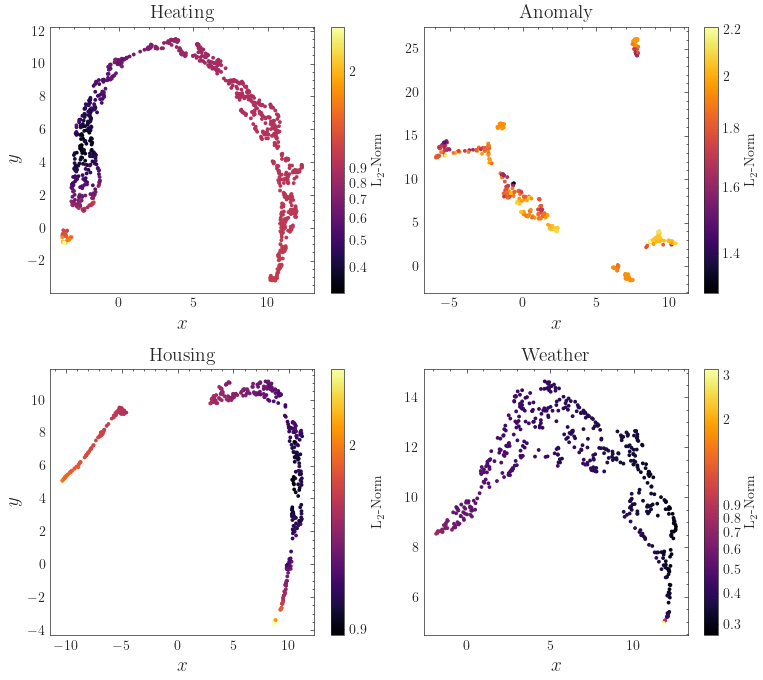

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm
from matplotlib.ticker import FuncFormatter, LogLocator
from sklearn.preprocessing import MinMaxScaler
from umap import UMAP
import numpy as np

sns.set_style("white")

def add_log_colorbar(fig, ax, scatter, label):
    cbar = fig.colorbar(scatter, ax=ax, label=label)
    cbar.locator = LogLocator(base=10.0, subs='auto', numticks=10)
    cbar.formatter = FuncFormatter(lambda x, _: f"{x:.2f}".rstrip("0").rstrip("."))
    cbar.update_ticks()

with plt.style.context('science'):
    fig, axes = plt.subplots(2, 2, figsize=(8, 7))
    axes = axes.flatten()

    # Heating
    norm_heating = np.linalg.norm(
        emb_heating := MinMaxScaler().fit_transform(
            embedding_df_heating.drop(columns=["Unnamed: 0", "cluster"], errors='ignore')
        ), axis=1
    )
    embedding_heating = UMAP(n_components=2, random_state=42).fit_transform(emb_heating)
    scatter1 = axes[0].scatter(
        embedding_heating[:, 0], embedding_heating[:, 1],
        c=norm_heating, s=3, cmap='inferno',
        norm=LogNorm(vmin=np.min(norm_heating[norm_heating > 0]), vmax=norm_heating.max())
    )
    axes[0].set_title("Heating", fontsize=14)
    axes[0].set_xlabel("$x$", fontsize=14)
    axes[0].set_ylabel("$y$", fontsize=14)
    add_log_colorbar(fig, axes[0], scatter1, "L$_2$-Norm")

    # Anomaly
    norm_anomaly = np.linalg.norm(
        emb_anomaly := MinMaxScaler().fit_transform(
            embedding_df_anomaly.drop(columns=["Unnamed: 0", "cluster"], errors='ignore')
        ), axis=1
    )
    embedding_anomaly = UMAP(n_components=2, random_state=42).fit_transform(emb_anomaly)
    scatter2 = axes[1].scatter(
        embedding_anomaly[:, 0], embedding_anomaly[:, 1],
        c=norm_anomaly, s=3, cmap='inferno',
        norm=LogNorm(vmin=np.min(norm_anomaly[norm_anomaly > 0]), vmax=norm_anomaly.max())
    )
    axes[1].set_title("Anomaly", fontsize=14)
    axes[1].set_xlabel("$x$", fontsize=14)
    axes[1].set_ylabel("")
    add_log_colorbar(fig, axes[1], scatter2, "L$_2$-Norm")

    # Housing
    norm_housing = np.linalg.norm(
        emb_housing := MinMaxScaler().fit_transform(
            embedding_df_housing.drop(columns=["Unnamed: 0", "cluster"], errors='ignore')
        ), axis=1
    )
    embedding_housing = UMAP(n_components=2, random_state=42).fit_transform(emb_housing)
    scatter3 = axes[2].scatter(
        embedding_housing[:, 0], embedding_housing[:, 1],
        c=norm_housing, s=3, cmap='inferno',
        norm=LogNorm(vmin=np.min(norm_housing[norm_housing > 0]), vmax=norm_housing.max())
    )
    axes[2].set_title("Housing", fontsize=14)
    axes[2].set_xlabel("$x$", fontsize=14)
    axes[2].set_ylabel("$y$", fontsize=14)
    add_log_colorbar(fig, axes[2], scatter3, "L$_2$-Norm")

    # Weather
    norm_weather = np.linalg.norm(
        emb_weather := MinMaxScaler().fit_transform(
            embedding_df_weather.drop(columns=["Unnamed: 0", "cluster"], errors='ignore')
        ), axis=1
    )
    embedding_weather = UMAP(n_components=2, random_state=42).fit_transform(emb_weather)
    scatter4 = axes[3].scatter(
        embedding_weather[:, 0], embedding_weather[:, 1],
        c=norm_weather, s=3, cmap='inferno',
        norm=LogNorm(vmin=np.min(norm_weather[norm_weather > 0]), vmax=norm_weather.max())
    )
    axes[3].set_title("Weather", fontsize=14)
    axes[3].set_xlabel("$x$", fontsize=14)
    axes[3].set_ylabel("")
    add_log_colorbar(fig, axes[3], scatter4, "L$_2$-Norm")

    plt.tight_layout()
    plt.savefig("../../reports/figures/embedding_size/2d_embedding.png")
    plt.show()


### Analyse arms

In [45]:
f = pd.DataFrame(embedding_heating, columns=["x", "y"])
f['l'] = norm_heating
grp_high = f[(f['y'] <= 0) & (f['x'] <= 0)]
grp_high = grp_high.sort_values(by="l", ascending=False).iloc[:5]
grp_low = f[f['y'] < -2]
grp_low = grp_low.sort_values(by="l", ascending=False).iloc[:5]
ids_low = embedding_df_heating.iloc[grp_low.index]['Unnamed: 0'].tolist()
ids_high = embedding_df_heating.iloc[grp_high.index]['Unnamed: 0'].tolist()
ds = heating_dataset("../../data/processed/heating_models/data")
test_set_entities = UniformSetSampler(10, TargetSelector(), Entropy()).get_sample_candidates(ds)
test_sets = [(e.test_x, e.test_y) for e in test_set_entities]
values_high = []
values_low = []
for i, id in enumerate(ids_low):
    values_low.append([])
    for test_x, test_y in test_sets:
        entity = ds.model_entity_by_id(id)
        pred = entity.predict(test_x)
        diff = np.mean(pred - test_y)
        values_low[i].append(diff)
    plt.plot([l for l in range(len(test_sets))], values_low[i], c='blue', marker='o', linestyle='dashed')
for i, id in enumerate(ids_high):
    values_high.append([])
    for test_x, test_y in test_sets:
        entity = ds.model_entity_by_id(id)
        pred = entity.predict(test_x)
        diff = np.mean(pred - test_y)
        values_high[i].append(diff)
    plt.plot([l for l in range(len(test_sets))], values_high[i], c='red', marker='x', linestyle='solid')
plt.xlabel("Training set")
plt.ylabel("Prediction error")
plt.axhline(y=0, c='black')
plt.savefig("../../reports/figures/embedding_size/heating_prediction_error.png")
plt.close()

In [46]:
from modelforge.datasets.datasets import immoscout_house_price_dataset

### Analyse arms
f = pd.DataFrame(embedding_housing, columns=["x", "y"])
f['l'] = norm_housing
grp_high = f[(f['y'] <= -2)]
grp_high = grp_high.sort_values(by="l", ascending=False).iloc[:5]
grp_low = f[f['x'] < -10]
grp_low = grp_low.sort_values(by="l", ascending=False).iloc[:5]
ids_low = embedding_df_housing.iloc[grp_low.index]['Unnamed: 0'].tolist()
ids_high = embedding_df_housing.iloc[grp_high.index]['Unnamed: 0'].tolist()
ds = immoscout_house_price_dataset("../../data/processed/immoscout24_models/house_price/data")
test_set_entities = UniformSetSampler(10, TargetSelector(), Entropy()).get_sample_candidates(ds)
test_sets = [(e.test_x, e.test_y) for e in test_set_entities]
values_high = []
values_low = []
for i, id in enumerate(ids_low):
    values_low.append([])
    for test_x, test_y in test_sets:
        entity = ds.model_entity_by_id(id)
        pred = entity.predict(test_x)
        diff = np.mean(pred - test_y)
        values_low[i].append(diff)
    plt.plot([l for l in range(len(test_sets))], values_low[i], c='blue', marker='o', linestyle='dashed')
for i, id in enumerate(ids_high):
    values_high.append([])
    for test_x, test_y in test_sets:
        entity = ds.model_entity_by_id(id)
        pred = entity.predict(test_x)
        diff = np.mean(pred - test_y)
        values_high[i].append(diff)
    plt.plot([l for l in range(len(test_sets))], values_high[i], c='red', marker='x', linestyle='solid')
plt.xlabel("Training set")
plt.ylabel("Prediction error")
plt.axhline(y=0, c='black')
plt.savefig("../../reports/figures/embedding_size/house_price_prediction_error.png")
plt.close()

In [47]:
from modelforge.datasets.datasets import weather_dataset_probabilistic_regression

### Analyse arms
f = pd.DataFrame(embedding_weather, columns=["x", "y"])
f['l'] = norm_weather
grp_high = f[(f['y'] <= 5.5)]
grp_high = grp_high.sort_values(by="l", ascending=False).iloc[:5]
grp_low = f[f['x'] < -1.5]
grp_low = grp_low.sort_values(by="l", ascending=False).iloc[:5]
ids_low = embedding_df_weather.iloc[grp_low.index]['Unnamed: 0'].tolist()
ids_high = embedding_df_weather.iloc[grp_high.index]['Unnamed: 0'].tolist()
ds = weather_dataset_probabilistic_regression("../../data/processed/weather_models/prob/data")
test_set_entities = UniformSetSampler(10, TargetSelector(), Entropy()).get_sample_candidates(ds)
test_sets = [(e.test_x, e.test_y) for e in test_set_entities]
values_high = []
values_low = []
for i, id in enumerate(ids_low):
    values_low.append([])
    for test_x, test_y in test_sets:
        entity = ds.model_entity_by_id(id)
        pred = entity.predict(test_x)['mean']
        diff = np.mean(pred.values - test_y.values)
        values_low[i].append(diff)
    plt.plot([l for l in range(len(test_sets))], values_low[i], c='blue', marker='o', linestyle='dashed')
for i, id in enumerate(ids_high):
    values_high.append([])
    for test_x, test_y in test_sets:
        entity = ds.model_entity_by_id(id)
        pred = entity.predict(test_x)['mean']
        diff = np.mean(pred.values - test_y.values)
        values_high[i].append(diff)
    plt.plot([l for l in range(len(test_sets))], values_high[i], c='red', marker='x', linestyle='solid')
plt.xlabel("Training set")
plt.ylabel("Prediction error")
plt.axhline(y=0, c='black')
plt.savefig("../../reports/figures/embedding_size/weather_prediction_error.png")
plt.close()

### 3d plots

In [48]:
import plotly.express as px


def embedding_3d(embedding_df: pd.DataFrame, reduction):
    embedding_df_3 = pd.DataFrame(reduction(n_components=3).fit_transform(embedding_df))
    min_pos = embedding_df_3.min().min()
    max_pos = embedding_df_3.max().max()

    fig = px.scatter_3d(embedding_df_3, x=embedding_df_3.columns[0], y=embedding_df_3.columns[1],
                        z=embedding_df_3.columns[2], width=800, height=800, opacity=1,
                        )

    fig.update_traces(marker=dict(size=4))
    return fig

#embedding_3d(embedding_df_heating, UMAP)

In [49]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import r2_score


def explained_variance_pls_regression(embedding_df: pd.DataFrame, reduction, max_num_components=None):
    # Inspired from https://medium.com/towards-data-science/umap-variance-explained-b0eacb5b0801
    if max_num_components is None:
        max_num_components = embedding_df.shape[1]
    predicted_var_expl = []
    for i in range(1, max_num_components):
        red_df = reduction(n_components=i).fit_transform(embedding_df)
        matrix_current = pd.DataFrame(red_df[:, 0:i])
        pls_current = PLSRegression(n_components = i)
        pls_current.fit(matrix_current, embedding_df)
        y_pred_current = pls_current.predict(matrix_current)
        predicted_var_expl.append({"n_components": i, "explained_var": r2_score(embedding_df, y_pred_current,
                                           multioutput='variance_weighted')})
        if i % 10 == 0:
            print(f"{i}/{max_num_components}")

    plot_df = pd.DataFrame(predicted_var_expl)
    sns.lineplot(plot_df, x="n_components", y="explained_var")

#explained_variance_pls_regression(embedding_df_heating, PCA, max_num_components=25)



In [50]:
def prepare_df(embedding_df):
    return embedding_df.drop(columns=['Unnamed: 0', 'cluster'])

def make_plot(embedding_df, name):
    embedding_df = prepare_df(embedding_df)
    #explained_variance_plot(embedding_df, max_num_components=25)
    #plt.savefig(f"../../reports/figures/embedding_size/explained_variance_pca_{name}.png")
    #plt.close()
    #explained_variance_pls_regression(embedding_df, PCA, max_num_components=25)
    #plt.savefig(f"../../reports/figures/embedding_size/explained_variance_pls_regression_pca_{name}.png")
    #plt.close()
    #explained_variance_pls_regression(embedding_df, UMAP, max_num_components=25)
    #plt.savefig(f"../../reports/figures/embedding_size/explained_variance_pls_regression_umap_{name}.png")
    #plt.close()
    #fig = embedding_3d(embedding_df, UMAP)
    #fig.write_html(f"../../reports/figures/embedding_size/3d_embedding_{name}.html")
    embedding_2d(embedding_df, UMAP)
    plt.savefig(f"../../reports/figures/embedding_size/2d_embedding_{name}.png")
    plt.close()


make_plot(embedding_df_heating, "heating")
make_plot(embedding_df_anomaly, "anomaly")
make_plot(embedding_df_housing, "house_price")
make_plot(embedding_df_weather, "weather")


In [51]:
print(prepare_df(embedding_df_heating).median())

embedding_0    25.212432
embedding_1    35.818625
embedding_2    24.779920
embedding_3    28.189054
embedding_4     0.839016
embedding_5    28.128424
embedding_6    22.951184
embedding_7    30.422816
embedding_8     5.415831
embedding_9     4.932161
dtype: float64


In [52]:
embedding_df_heating_prep = prepare_df(embedding_df_heating)
#explained_variance_pls_regression(embedding_df_heating_prep, UMAP, max_num_components=25)

## Internal cluster metrics

In [53]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [54]:
def compute_internal_metrics_over_k(embedding_df, name, clusterer, reduction=None, n_components=None):

    embedding_df = prepare_df(embedding_df)
    if reduction is not None:
        embedding_df = reduction(n_components=n_components).fit_transform(embedding_df)

    scores = []
    for k in range(2, int(embedding_df.shape[0] /2)):
        labels = clusterer(n_clusters=k).fit_predict(embedding_df)
        scores.append({
            "silhouette": silhouette_score(embedding_df, labels),
            "calinski": calinski_harabasz_score(embedding_df, labels),
            "davies_bouldin": davies_bouldin_score(embedding_df, labels),
            "k": k,
            "share_retained": k / embedding_df.shape[0]
        })
        if k % 10 == 0:
            print(f"{k}/{int(embedding_df.shape[0] /2)}")

    score_df = pd.DataFrame(scores)
    sns.lineplot(score_df, x='share_retained', y="silhouette")
    plt.suptitle("The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.")
    plt.savefig(f"../../reports/figures/embedding_size/silhouette_{name}.png")
    plt.close()
    sns.lineplot(score_df, x='share_retained', y="calinski")
    plt.suptitle("The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster")
    plt.savefig(f"../../reports/figures/embedding_size/calinski_{name}.png")
    plt.close()
    sns.lineplot(score_df, x='share_retained', y="davies_bouldin")
    plt.suptitle("Zero is the lowest possible score. Values closer to zero indicate a better partition.")
    plt.savefig(f"../../reports/figures/embedding_size/davies_{name}.png")
    plt.close()

In [55]:
compute_internal_metrics_over_k(embedding_df_heating, "heating", KMeans)
compute_internal_metrics_over_k(embedding_df_anomaly, "anomaly", KMeans)
compute_internal_metrics_over_k(embedding_df_housing, "house_price", KMeans)
compute_internal_metrics_over_k(embedding_df_weather, "weather", KMeans)


10/458
20/458
30/458
40/458
50/458
60/458
70/458
80/458
90/458
100/458
110/458
120/458
130/458
140/458
150/458
160/458
170/458
180/458
190/458
200/458
210/458
220/458
230/458
240/458
250/458
260/458
270/458
280/458
290/458
300/458
310/458
320/458
330/458
340/458
350/458
360/458
370/458
380/458
390/458
400/458
410/458
420/458
430/458
440/458
450/458
10/178
20/178
30/178
40/178
50/178
60/178
70/178
80/178
90/178
100/178
110/178
120/178
130/178
140/178
150/178
160/178
170/178
10/194
20/194
30/194
40/194
50/194
60/194
70/194
80/194
90/194
100/194
110/194
120/194
130/194
140/194
150/194
160/194
170/194
180/194
190/194
10/248
20/248
30/248
40/248
50/248
60/248
70/248
80/248
90/248
100/248
110/248
120/248
130/248
140/248
150/248
160/248
170/248
180/248
190/248
200/248
210/248
220/248
230/248
240/248


In [56]:
compute_internal_metrics_over_k(embedding_df_heating, "umap_heating", KMeans, UMAP, 5)
compute_internal_metrics_over_k(embedding_df_anomaly, "umap_anomaly", KMeans, UMAP, 5)
compute_internal_metrics_over_k(embedding_df_housing, "umap_house_price", KMeans, UMAP, 5)
compute_internal_metrics_over_k(embedding_df_weather, "umap_weather", KMeans, UMAP, 5)

10/458
20/458
30/458
40/458
50/458
60/458
70/458
80/458
90/458
100/458
110/458
120/458
130/458
140/458
150/458
160/458
170/458
180/458
190/458
200/458
210/458
220/458
230/458
240/458
250/458
260/458
270/458
280/458
290/458
300/458
310/458
320/458
330/458
340/458
350/458
360/458
370/458
380/458
390/458
400/458
410/458
420/458
430/458
440/458
450/458
10/178
20/178
30/178
40/178
50/178
60/178
70/178
80/178
90/178
100/178
110/178
120/178
130/178
140/178
150/178
160/178
170/178
10/194
20/194
30/194
40/194
50/194
60/194
70/194
80/194
90/194
100/194
110/194
120/194
130/194
140/194
150/194
160/194
170/194
180/194
190/194
10/248
20/248
30/248
40/248
50/248
60/248
70/248
80/248
90/248
100/248
110/248
120/248
130/248
140/248
150/248
160/248
170/248
180/248
190/248
200/248
210/248
220/248
230/248
240/248
